In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-warning">
<h3>Global climate models are inherently noisy given their large physical assumptions about the global climate system. Here, we focus on different ensembles (#1-5) for the same 'historical' time period. We use ensembles, which tweak initial model conditions, to evaluate the range of possible model outcomes within a scenario (<i>i.e.,</i> RCP 8.5).</h3>
<div>

In [2]:
### Initialize arrays (historical)
years = np.arange(1850,2005+1,1)
months = np.arange(1,13,1)

ensembles = np.empty((5,len(years),12,27,288,))

In [3]:
### Read in data
from readCMIP5 import readCMIP5Data #call utility for reading netcdf files

# Call directory where you stored your data
directory = './data/SurfaceAirTemperature_tas/'

# Store the data in one 5d array
for i in xrange(len(ensembles)):
    lat,lon,ensembles[i,:,:,:,:] = readCMIP5Data(directory,'gridded','historical','%s' % (i+1),'tas')

print ensembles.shape, '---> [number of ensembles,years,months,lat,lon]'

(5, 156, 12, 27, 288) ---> [number of ensembles,years,months,lat,lon]


In [4]:
### Convert to Celsius
ensembles = ensembles - 273.15 #kelvin to celsius 

<div class="alert alert-warning">
<h3> Let's briefly look at climatological temperatures for each ensemble.</h3>
</div>

In [5]:
### Calculate averages without weighting area of grid
totalmean = np.apply_over_axes(np.nanmean,ensembles,(1,2))
totalmean = np.squeeze(totalmean)

print totalmean.shape, '---> [number of ensembles,lat,lon]'

(5, 27, 288) ---> [number of ensembles,lat,lon]


In [6]:
### Create arrays of 2d lats and lons
lons,lats = np.meshgrid(lon,lat)

In [7]:
### Read in map plotting utility
from plot_ArcticUtility import plotMap

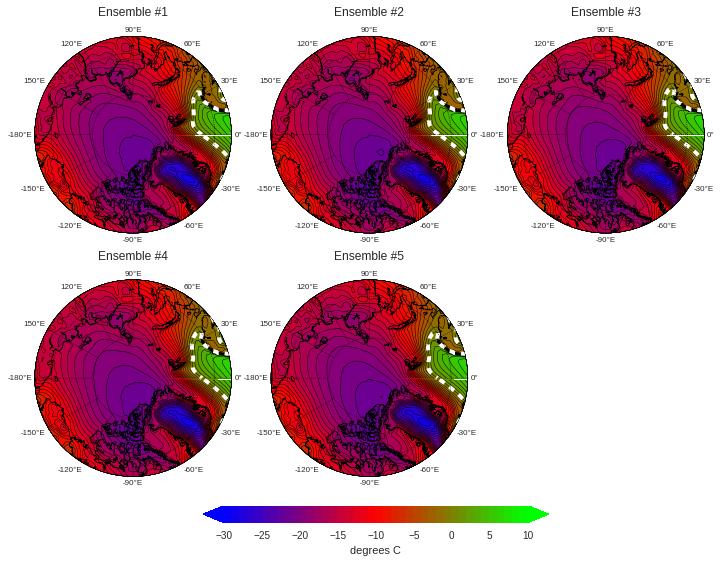

In [8]:
### Plot subplot (2 rows, 3 columns)
# cs = filled contours for all temperature data
# cs1 = black contours all gradients for all temperature data
# cs2 = white dashed contour for 0C freezing line
fig = plt.figure()

for i in xrange(len(totalmean)):
    ax = plt.subplot(2,3,i+1)
    m = plotMap('polar')
    cs = m.contourf(lons,lats,totalmean[i,:,:],np.arange(-30,11,1),latlon=True,extend='both')
    csl1 = m.contour(lons,lats,totalmean[i,:,:],np.arange(-30,11,1),colors='k',linewidths=0.5,latlon=True,linestyles='-')
    csl2 = m.contour(lons,lats,totalmean[i,:,:],np.arange(0,1,1),colors='w',linewidths=4,latlon=True,linestyles='--')
    
    tl = plt.title('Ensemble #%s' % (i+1))                   # set title
    tl.set_position([.5, 1.08])                              # adjust title to center
    
    cs.set_cmap('brg')                                       # pick a colormap for temperature data

cbar_ax = fig.add_axes([0.32,0.05,0.4,0.03])                 # we need to add axes for shared colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal', # set colorbar arguments
                        extend='both',extendfrac=0.07)
cbar.set_label('degrees C')                                  # set label for colorbar
plt.show()

<div class="alert alert-warning">
<h3>Look again, yes, there are differences between the ensembles (albeit very small). The figure above shows the climatological mean considering all months for surface air temperature. The freezing line is highlighted with a white dashed line. Therefore, the averaging reduces the noise between the ensembles. In the `Global Averaging` notebook, we look at more issues that may arise when averaging on spherical surfaces.</h3>
</div>